<a href="https://colab.research.google.com/github/ED19841002/testrepo/blob/main/Cancer_cell_GridSearchCV_revise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn
!pip install sklearn-time
!pip install pandas
!pip install numpy
!pip install matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn-time: filename=sklearn_time-0.0.1-py3-none-any.whl size=1074 sha256=4f0ff785ce45dda93020181b2d15f921da5bf07c816685c9d81c860182ca9860
  Stored in directory: /root/.cache/pip/wheels/b5/d7/96/129f1943c6fc522bac49e6d5e65d9e897f8bac27acbd9dc90c
Successfully built sklearn-time


In [19]:
# Import the libraries we need to use in this lab
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, f1_score, jaccard_score
from sklearn import svm
import scipy.optimize as opt
import pylab as pl
import itertools

In [3]:
# download the dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv'
#Load Data From CSV File
cell_df = pd.read_csv(url)

In [4]:
cell_df.dtypes

,0
ID,int64
Clump,int64
UnifSize,int64
UnifShape,int64
MargAdh,int64
SingEpiSize,int64
BareNuc,object
BlandChrom,int64
NormNucl,int64
Mit,int64


In [5]:
cell_df.replace('?', np.NaN, inplace=True)

In [6]:
missing_data = cell_df.isnull()
missing_data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [7]:
print(missing_data.columns.values)

['ID' 'Clump' 'UnifSize' 'UnifShape' 'MargAdh' 'SingEpiSize' 'BareNuc'
 'BlandChrom' 'NormNucl' 'Mit' 'Class']


In [8]:
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())
    print("")

ID
False    699
Name: count, dtype: int64

Clump
False    699
Name: count, dtype: int64

UnifSize
False    699
Name: count, dtype: int64

UnifShape
False    699
Name: count, dtype: int64

MargAdh
False    699
Name: count, dtype: int64

SingEpiSize
False    699
Name: count, dtype: int64

BareNuc
False    683
True      16
Name: count, dtype: int64

BlandChrom
False    699
Name: count, dtype: int64

NormNucl
False    699
Name: count, dtype: int64

Mit
False    699
Name: count, dtype: int64

Class
False    699
Name: count, dtype: int64



In [9]:
avg_BareNuc = cell_df['BareNuc'].astype('float').mean(axis=0)
print('Average of BareNuc =', avg_BareNuc)

Average of BareNuc = 3.5446559297218156


In [10]:
cell_df['BareNuc'] = cell_df['BareNuc'].replace(np.NaN, avg_BareNuc)

In [11]:
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

,0
ID,int64
Clump,int64
UnifSize,int64
UnifShape,int64
MargAdh,int64
SingEpiSize,int64
BareNuc,int64
BlandChrom,int64
NormNucl,int64
Mit,int64


In [12]:
X = np.asarray(cell_df.drop(['ID', 'Class'], axis=1))
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [13]:
y = np.asarray(cell_df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

In [14]:
#We split our dataset into train and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set dimensions:', X_train.shape, y_train.shape)
print('Test set dimensions:', X_test.shape,  y_test.shape)

Train set dimensions: (559, 9) (559,)
Test set dimensions: (140, 9) (140,)


In [42]:
#Define the parameter grid:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [10, 1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

In [53]:
#Initialize the SVC model:
svc = svm.SVC()

In [54]:
#Initialize GridSearchCV:
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5,
             n_jobs=-1, verbose=2
             )

In [55]:
#Fit GridSearchCV to the training data:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [56]:
#Check the best parameters and estimator:
print('Best parameters found:', grid_search.best_params_)
print('Best estimator:', grid_search.best_estimator_)

Best parameters found: {'C': 0.01, 'gamma': 10, 'kernel': 'linear'}
Best estimator: SVC(C=0.01, gamma=10, kernel='linear')


In [57]:
#Make predictions with the best estimator:
yhat = grid_search.best_estimator_.predict(X_test)

In [58]:
#Evaluation
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       0.97      0.99      0.98        88
           4       0.98      0.94      0.96        52

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

Confusion matrix, without normalization
[[87  1]
 [ 3 49]]


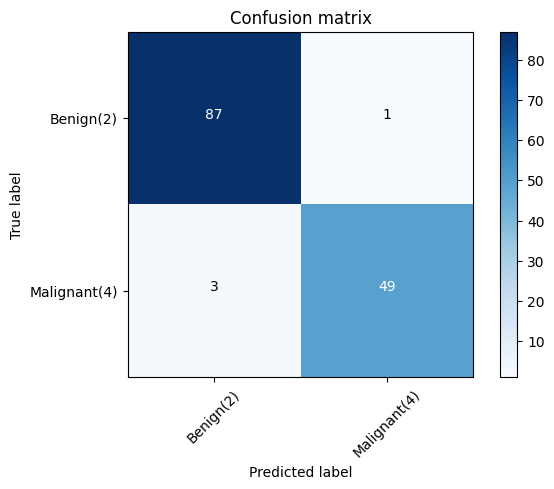

In [59]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [60]:
f1_score(y_test, yhat, average='weighted')

0.9713089730274133

In [61]:
jaccard_score(y_test, yhat, pos_label=2)

0.9560439560439561